# DATA LOADING

Pertama harus memanggil import libary yang dibuat karena jika tidak dipanggil maka akan error. Yg dibutuhkan
1. Numpy untuk perhitungan statistik
2. Pandas untuk memproses data atau tabel
3. Seaborn, Plotly dan Matplotlib untuk visualisasi grafik yang akan dibuat

nb:
- Set option yang digunakan untuk menampilkan maksimal jumlah kolom atau baris yang akan ditampilkan

In [15]:
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt
import seaborn as sns
from plotly import tools
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot

%matplotlib inline

In [16]:
df = pd.read_csv("Pokemon.csv", sep=';')

In [17]:
pd.set_option('display.max_columns', 13)
pd.set_option('display.max_row', 20)

In [18]:
df

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [19]:
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [20]:
df.tail()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True
799,721,Volcanion,Fire,Water,600,80,110,120,130,90,70,6,True


In [21]:
df.index

RangeIndex(start=0, stop=800, step=1)

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800 entries, 0 to 799
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   #           800 non-null    int64 
 1   Name        800 non-null    object
 2   Type 1      800 non-null    object
 3   Type 2      414 non-null    object
 4   Total       800 non-null    int64 
 5   HP          800 non-null    int64 
 6   Attack      800 non-null    int64 
 7   Defense     800 non-null    int64 
 8   Sp. Atk     800 non-null    int64 
 9   Sp. Def     800 non-null    int64 
 10  Speed       800 non-null    int64 
 11  Generation  800 non-null    int64 
 12  Legendary   800 non-null    bool  
dtypes: bool(1), int64(9), object(3)
memory usage: 75.9+ KB


In [23]:
df.describe()

,#,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.000000,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,362.813750,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,208.343798,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.000000,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,184.750000,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,364.500000,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,539.250000,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,721.000000,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


# MISSING VALUE

Pada missing value
1. Akan dicari terlebih dahulu, nilai yang kosong, nilai yang bersifat integer tapi dikolom string dan sebagainya. 
2. Cara melihatnya adalah dengan isnull lalu sum dan mengisinya dengan fillna
3. Dibuat perintah baru supaya pada tabel yang dibuat tidak mengubah isi tabel yang akan dibuat. Karena jika tidak dibuat, maka harus menjalankan program mulai dari import lagi.

nb:
- isnull digunakan untuk mengecek ada yang tidak diisi atau tidak
- fillna buat mengisi data yang kosong tersebut

In [24]:
df.isnull().sum()

#               0
Name            0
Type 1          0
Type 2        386
Total           0
HP              0
Attack          0
Defense         0
Sp. Atk         0
Sp. Def         0
Speed           0
Generation      0
Legendary       0
dtype: int64

In [25]:
mis = df.copy()

In [26]:
mis["Type 2"].fillna(value="-", inplace= True)

In [27]:
mis.isnull().sum()

#             0
Name          0
Type 1        0
Type 2        0
Total         0
HP            0
Attack        0
Defense       0
Sp. Atk       0
Sp. Def       0
Speed         0
Generation    0
Legendary     0
dtype: int64

# MANIPULATING COLUMNS

Pada Manipulating Columns
1. Dibuat perintah baru supaya pada tabel yang dibuat tidak mengubah isi tabel yang akan dibuat. Karena jika tidak dibuat, maka harus menjalankan program mulai dari import lagi.
2. Jika sudah kita bisa memanipulasi data/ tabel seperti mengubah, menghapus

Nb:
- Inplace true itu digunakan menghapus kolom dan tidak menampilkan, ketika false langsung menghapus kolom dan menampilkan
- Axis bernilai 1 supaya True bisa dijalankan saja, kalo angka selain 1 tidak bisa dijalankan

In [28]:
col = df.copy()

In [29]:
col

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [30]:
rename_col = col.rename(
    columns={
        "Name" : "Pokemon" ,
        "Type 1" : "Skill 1",
        "Type 2" :"Skill 2"
    })

In [31]:
rename_col

,#,Pokemon,Skill 1,Skill 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [32]:
rename_col.drop("Speed", inplace = True, axis = 1)

In [33]:
rename_col

,#,Pokemon,Skill 1,Skill 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,6,True


# DATA QUERY

Pada Data Query
1. Data query untuk meminimalisir dengan memanggil data yang bersifat penting

Nb:
- .str.starswith digunakan untuk mencari kalimat yang dimulai
- .str.endswith digunakan untuk mencari kalimat huruf yang terakhir

In [34]:
dat = mis.copy()

In [35]:
dat

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,-,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [36]:
dat[(dat["Name"].str.endswith("aur")) & 
    (dat["Type 2"] == "Poison") &
    (dat["Legendary"] == False)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False


In [37]:
dat[(dat["Name"].str.startswith("Hoo")) & 
    (dat["Type 1"] == "Psychic") &
    (dat["Legendary"] == True)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


In [38]:
dat[(dat["Type 1"] == "Water") & 
    (dat["Type 2"] == "Dark") &
    (dat["Total"] >= 300)&
    (dat["Defense"] >= 60)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
141,130,GyaradosMega Gyarados,Water,Dark,640,95,155,109,70,130,81,1,False
349,319,SharpedoMega Sharpedo,Water,Dark,560,70,140,70,110,65,105,3,False
374,342,Crawdaunt,Water,Dark,468,63,120,85,90,55,55,3,False
726,658,Greninja,Water,Dark,530,72,95,67,103,71,122,6,False


In [39]:
dat[(dat["Type 1"] == "Poison") &
    (dat["Speed"] <= 70) &  
    (dat["Legendary"] == False)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
28,23,Ekans,Poison,-,288,35,60,44,40,54,55,1,False
34,29,Nidoran♀,Poison,-,275,55,47,52,40,40,41,1,False
35,30,Nidorina,Poison,-,365,70,62,67,55,55,56,1,False
37,32,Nidoran♂,Poison,-,273,46,57,40,40,40,50,1,False
38,33,Nidorino,Poison,-,365,61,72,57,55,55,65,1,False
46,41,Zubat,Poison,Flying,245,40,45,35,30,40,55,1,False
95,88,Grimer,Poison,-,325,80,80,50,40,50,25,1,False
96,89,Muk,Poison,-,500,105,105,75,65,100,50,1,False
117,109,Koffing,Poison,-,340,40,65,95,60,45,35,1,False
118,110,Weezing,Poison,-,490,65,90,120,85,70,60,1,False


# GROUPING AND AGGREGATING

Pada Grouping dan Aggregating 
1. Perintahnya diganti supaya tabel aslinya tetap utuh
2. Setelah itu tampilkan dengan .groupby dan .agg

Nb:
- groupby digunakan untuk menampilkan datanya berdasarkan kolom
- agg digunakan untuk sum, count, mean dan median yang nantinya juga ditampilkan tetapi masih berantakan
- reset index digunakan untuk merapihkan kolom yang dibuat
- count untuk menampilkan jumlah ID bukan Nomor ID
- sum untuk menampilkan total keseluruhan dari count itu
- ascending false supaya tidak diurutkan dari huruf

In [40]:
gro = df.copy()

In [41]:
#1. Menampilkan Type 1 adalah Rock dan Type 2 adalah ground
gro[(gro["Type 1"] == "Rock") & (gro["Type 2"] == "Ground")]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
80,74,Geodude,Rock,Ground,300,40,80,100,30,30,20,1,False
81,75,Graveler,Rock,Ground,390,55,95,115,45,45,35,1,False
82,76,Golem,Rock,Ground,495,80,120,130,55,65,45,1,False
103,95,Onix,Rock,Ground,385,35,45,160,30,45,70,1,False
265,246,Larvitar,Rock,Ground,300,50,64,50,45,50,41,2,False
266,247,Pupitar,Rock,Ground,410,70,84,70,65,70,51,2,False


In [42]:
#Menampilkan Name dan Total dimana Type1 adalah rock, Type2 adalah ground
gro[(gro["Type 1"] == "Rock") & 
    (gro["Type 2"] == "Ground")
   ].groupby(["Name", "Total"]).agg({"#":"count"}).reset_index() #Untuk menampilkan jumlah id bukan nomer id

,Name,Total,#
0,Geodude,300,1
1,Golem,495,1
2,Graveler,390,1
3,Larvitar,300,1
4,Onix,385,1
5,Pupitar,410,1


In [43]:
#2. Menampilkan HP, att, def, sp att, spp deff, speed yang berjumlah diatas 100
gro[(gro["HP"] >= 100)&
    (gro["Attack"] >= 100) & 
    (gro["Defense"] >= 100) &
   (gro["Sp. Atk"] >= 100)&
   (gro["Sp. Def"] >= 100)&
   (gro["Speed"] >= 100)]

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
163,150,MewtwoMega Mewtwo X,Psychic,Fighting,780,106,190,100,154,100,130,1,True
165,151,Mew,Psychic,NaN,600,100,100,100,100,100,100,1,False
271,251,Celebi,Psychic,Grass,600,100,100,100,100,100,100,2,False
426,384,RayquazaMega Rayquaza,Dragon,Flying,780,105,180,100,180,100,115,3,True
427,385,Jirachi,Steel,Psychic,600,100,100,100,100,100,100,3,True
548,490,Manaphy,Water,NaN,600,100,100,100,100,100,100,4,False
550,492,ShayminLand Forme,Grass,NaN,600,100,100,100,100,100,100,4,True
552,493,Arceus,Normal,NaN,720,120,120,120,120,120,120,4,True
553,494,Victini,Psychic,Fire,600,100,100,100,100,100,100,5,True


In [44]:
#Menampilkan Name, Generation,ID yang memiliki atribut > 100 dan diurutkan dari KOLOM TOTAL(total terbesar)
gro[(gro["HP"] >= 100)&
    (gro["Attack"] >= 100) & 
    (gro["Defense"] >= 100) &
   (gro["Sp. Atk"] >= 100)&
   (gro["Sp. Def"] >= 100)&
   (gro["Speed"] >= 100)
   ].groupby(["Name", "Generation"]).agg({"Total":"sum"}).sort_values("Total", ascending = False).reset_index()
#False supaya tidak diurutkan dari huruf

,Name,Generation,Total
0,MewtwoMega Mewtwo X,1,780
1,RayquazaMega Rayquaza,3,780
2,Arceus,4,720
3,Celebi,2,600
4,Jirachi,3,600
5,Manaphy,4,600
6,Mew,1,600
7,ShayminLand Forme,4,600
8,Victini,5,600


In [45]:
#3. Menampilkan Name, type 1, type 2, dan generation. Dan agresiasi jumlah total Attack dan Defense
gro[(gro["Type 1"] == "Grass")&
    (gro["Type 2"] == "Poison") & 
    (gro["Legendary"] == False )
   ].groupby(["Name", "Type 1", "Type 2", "Generation"]).agg({"Attack": "sum", "Defense" :"sum"}).reset_index()

,Name,Type 1,Type 2,Generation,Attack,Defense
0,Amoonguss,Grass,Poison,5,85,70
1,Bellsprout,Grass,Poison,1,75,35
2,Budew,Grass,Poison,4,30,35
3,Bulbasaur,Grass,Poison,1,49,49
4,Foongus,Grass,Poison,5,55,45
5,Gloom,Grass,Poison,1,65,70
6,Ivysaur,Grass,Poison,1,62,63
7,Oddish,Grass,Poison,1,50,55
8,Roselia,Grass,Poison,3,60,45
9,Roserade,Grass,Poison,4,70,65


In [46]:
#4. Menampilkan type 1 dan type 2 dengan agresiasi total
df_1 = df.groupby(["Type 1", "Type 2"]).agg({"Total": "sum"}).reset_index()
df_1

,Type 1,Type 2,Total
0,Bug,Electric,791
1,Bug,Fighting,1100
2,Bug,Fire,910
3,Bug,Flying,5873
4,Bug,Ghost,236
...,...,...,...
131,Water,Ice,1535
132,Water,Poison,1280
133,Water,Psychic,2405
134,Water,Rock,1715


In [47]:
#5. 
df_2 = df.groupby(["Type 1", "Type 2"]).agg({"Attack": "count", "Defense":"count"})
df_2

Attack  Defense
Type 1 Type 2                   
Bug    Electric       2        2
       Fighting       2        2
       Fire           2        2
       Flying        14       14
       Ghost          1        1
...                 ...      ...
Water  Ice            3        3
       Poison         3        3
       Psychic        5        5
       Rock           4        4
       Steel          1        1

[136 rows x 2 columns]

# PANDAS VISUALIZATION

Dalam Pandas visualization digunakan:
1. Memanggil perintah dimana tabel sudah diisi semua, dan tidak bernilai null. Supaya tabel yang bernilai null bisa dipanggil

nb:
- figure merupakan bawaan dari plotly, untuk bisa memanggil figsize dimana digunakan untuk ukuran dari bar grafik
- show untuk menampilkan
- countplot merupakan bawaan dari plotly yang digunakan untuk menampilkan jumlah yang sering muncul (modus), tidak bisa disanding integer dengan integer, string dengan string
- boxplot merupakan bawaan dari plotly yang digunakan untuk menampilkan jumlah total (sum), harus disandingkan integer dengan integer

In [48]:
vis = mis.copy()

In [49]:
vis

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,-,309,39,52,43,60,50,65,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,719,Diancie,Rock,Fairy,600,50,100,150,100,150,50,6,True
796,719,DiancieMega Diancie,Rock,Fairy,700,50,160,110,160,110,110,6,True
797,720,HoopaHoopa Confined,Psychic,Ghost,600,80,110,60,150,130,70,6,True
798,720,HoopaHoopa Unbound,Psychic,Dark,680,80,160,60,170,130,80,6,True


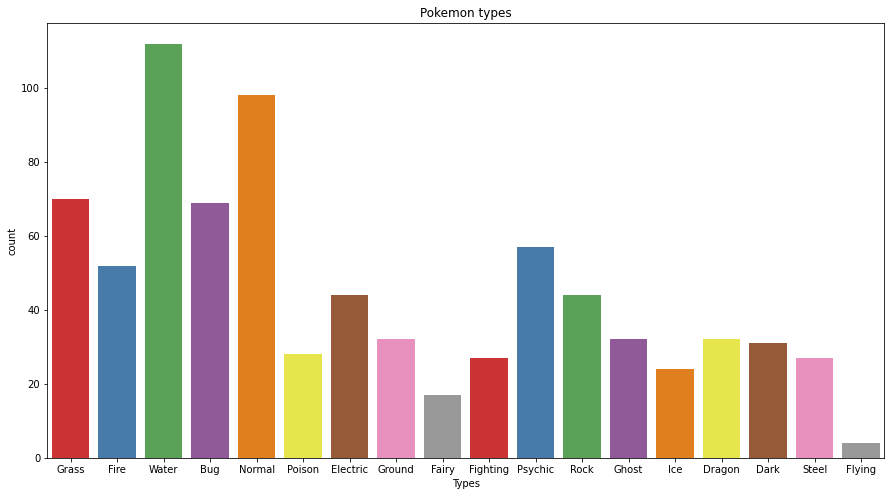

In [50]:
plt.figure(figsize=(15,8))
sns.countplot(x= vis['Type 1'],palette='Set1')
plt.xlabel('Types')
plt.title('Pokemon types')
plt.show()

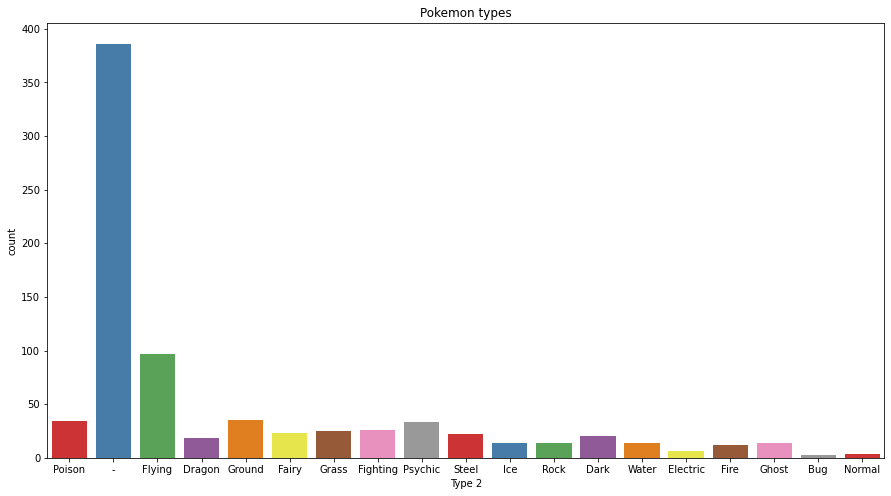

In [51]:
plt.figure(figsize=(15,8)) #count of type 1 pokemons
sns.countplot(x = vis['Type 2'],palette='Set1')
plt.title('Pokemon types')
plt.show()

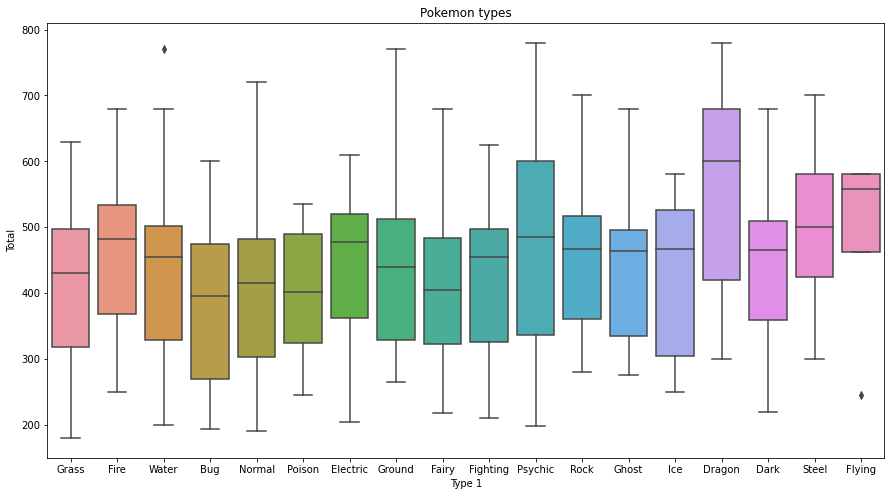

In [52]:
plt.figure(figsize=(15,8)) #count of type 1 pokemons
sns.boxplot(x = vis['Type 1'], y =vis['Total'])
plt.title('Pokemon types')
plt.show()

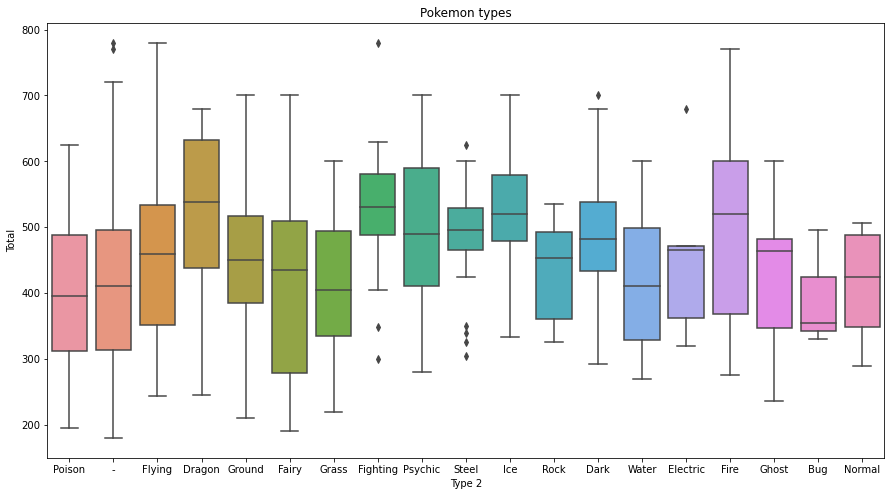

In [53]:
plt.figure(figsize=(15,8)) #count of type 1 pokemons
sns.boxplot(x = vis['Type 2'], y = vis['Total'])
plt.title('Pokemon types')
plt.show()

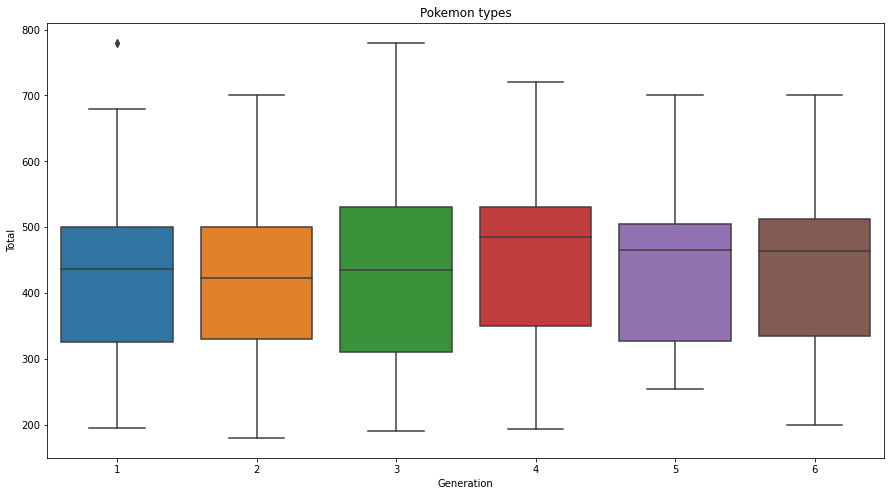

In [54]:
plt.figure(figsize=(15,8)) #count of type 1 pokemons
sns.boxplot(x = vis['Generation'], y = vis['Total'])
plt.title('Pokemon types')
plt.show()

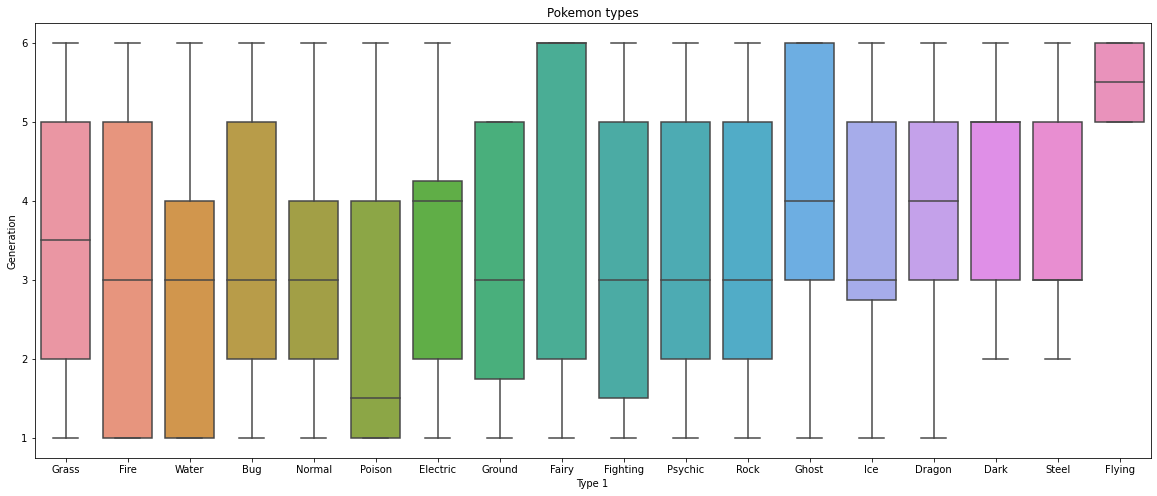

In [55]:
plt.figure(figsize=(20,8)) #count of type 1 pokemons
sns.boxplot(x = vis['Type 1'], y = vis['Generation'])
plt.title('Pokemon types')
plt.show()

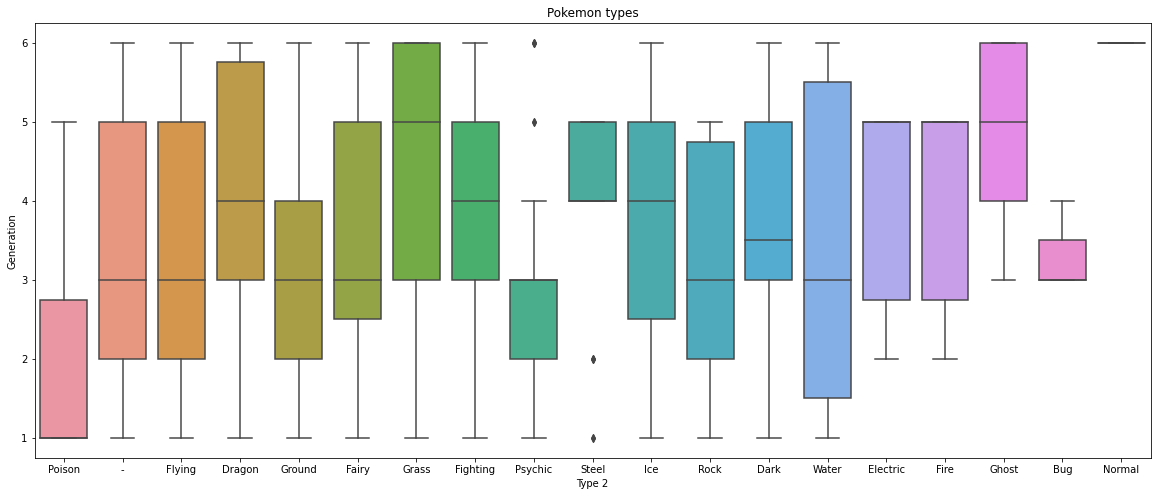

In [56]:
plt.figure(figsize=(20,8)) #count of type 1 pokemons
sns.boxplot(x = vis['Type 2'], y = vis['Generation'])
plt.title('Pokemon types')
plt.show()

<AxesSubplot:>

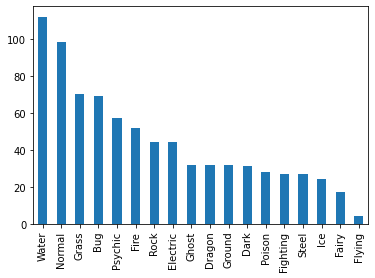

In [57]:
vis["Type 1"].value_counts().plot(kind="bar")

<AxesSubplot:>

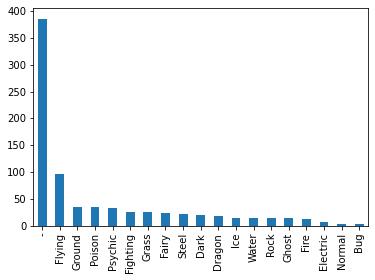

In [58]:
vis["Type 2"].value_counts().plot(kind="bar")

# KESIMPULAN EKSPLORASI

Dengan analisis dan eksplorasi data yang dilakukan, akan didapatkan hasil sebagai berikut:
- Modus (yang sering muncul) dari tipe 1 adalah Tipe Water sedangkan yang sering tidak muncul adalah Tipe Flying
- Modus (yang sering muncul) tipe 2 adalah NaN(yang tidak memiliki tipe) sedangkan yang sering tidak muncul adalah Tipe Bug
- Tipe 1 jika diitung secara total yang paling unggul adalah Tipe Dragon
- Tipe 2 jika diitung secara total yang paling unggul juga adalah Tipe Dragon
- Total kekuatan dari setiap generasi memiliki nilai imbang dan signifikan yaitu range diantara 300 sampai 520
- Tipe 1 yang memiliki generasi 1 adalah Tipe Fire, Water dan Poison dan yang memiliki generasi 6 yaitu, Tipe Fairy, Ghost dan Flying
- Tipe 2 yang memiliki generasi 1 hanya Tipe Poison dan yang memiliki generasi 6 yaitu, Grass dan Ghost